In [4]:
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  

import seaborn as sns
from sklearn.cluster import KMeans

# K-Means

In [5]:
data_frame = pd.read_csv("/home/veeraballi/Desktop/Study/G-means/hw5-3d-data.csv")

In [6]:
data_frame.head(5)

,x1,x2,x3
0,100,125,103
1,102,126,104
2,103,126,103
3,101,126,104
4,104,128,106


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
x1    720 non-null int64
x2    720 non-null int64
x3    720 non-null int64
dtypes: int64(3)
memory usage: 16.9 KB


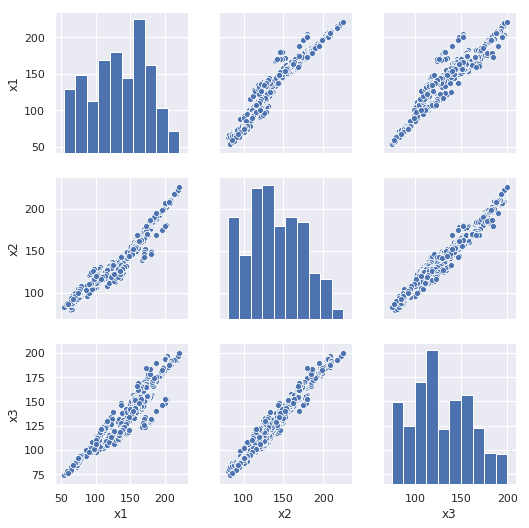

In [8]:
sns.set(style='darkgrid', context = 'notebook')
sns.pairplot(data_frame)

# Feature Scaling using standard scalar

In [9]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_values = scalar.fit_transform(data_frame.values)
print scaled_values


[[-0.82132887 -0.41120062 -0.80961573]
 [-0.77274351 -0.38133132 -0.77746331]
 [-0.74845082 -0.38133132 -0.80961573]
 ...
 [-1.7930362  -1.57610309 -1.677731  ]
 [-1.59869474 -1.36701803 -1.42051166]
 [-1.42864596 -1.15793297 -1.16329232]]


/home/veeraballi/anaconda2/envs/Yelp/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/veeraballi/anaconda2/envs/Yelp/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
print scalar.mean_
print scalar.var_
print scalar.scale_

[133.80972222 138.76666667 128.18055556]
[1694.52907215 1120.85666667  967.32573302]
[41.16465805 33.47919752 31.1018606 ]


In [16]:
kmeans = KMeans(n_clusters=1, init= "k-means++", random_state = 3)

In [17]:
kmeans.fit(scaled_values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [21]:
y_pred = kmeans.predict(scaled_values)

In [45]:
print kmeans.cluster_centers_

[[-3.74391876e-16 -5.26739146e-16  1.49880108e-16]]


In [22]:
list_of_centers = kmeans.cluster_centers_
type(list_of_centers)

numpy.ndarray

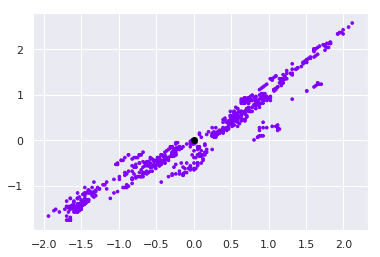

In [32]:
plt.scatter(scaled_values[:,0], scaled_values[:,1], c=y_pred, cmap='rainbow', s= 7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.show()

# G-Means

In [11]:
def createClusters(list_of_centers,data,no_of_clusters):
    clusters = []
    
    #Run K-Means
    kmeans = KMeans(n_clusters=no_of_clusters, random_state = 3, init = list_of_centers , n_init = 1)
    cluster_labels = kmeans.fit_predict(data_frame.values)
    
    # create a new df by joining column wise old df and cluster_labels
    new_df = data.copy()
    new_df['cluster_labels'] = pd.Series(cluster_labels)
    
    # filter for each cluster_label and add to a list and return list
    for each_label in range(no_of_clusters):
        cluster = new_df[new_df['cluster_labels'] == each_label] 
        cluster.drop(['cluster_labels'],axis = 1, inplace = True)
        clusters.append(cluster.values)
    return clusters

In [12]:
def isGaussian(cluster):
    significance_level = 0.0001
    critical_val = 1.8692
    child1 
    
    

IndentationError: expected an indented block (<ipython-input-12-e3354031869f>, line 2)

In [13]:
k = 1
# intialize list_of_center to average of all 720 points in a data frame
while(True):
    clusters = createClusters(list_of_centers,scaled_values,k)
    for cluster in clusters: 
       if(isGaussian(cluster)):
           continue
       else:
            # createClusters(list_of_centers,data_frame,k)
            continue
        

IndentationError: expected an indented block (<ipython-input-13-2691ae724486>, line 11)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_values)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.components_

array([[ 0.57466582,  0.58045634,  0.57691388],
       [ 0.77393505, -0.15628172, -0.6136779 ],
       [-0.26605213,  0.79915359, -0.53904527]])

In [35]:
pca.explained_variance_ratio_

array([0.97675423, 0.01727366, 0.00597211])

In [36]:
pca.explained_variance_

array([2.93433815, 0.05189307, 0.01794125])

## Now calculate m =  s . sqrt(2 * lambda / pi )

In [38]:
main_pc = pca.components_[:,0]  # this is s
print main_pc

[ 0.57466582  0.77393505 -0.26605213]


In [42]:
# extracting lambda(eigen val) from pca.explained_variance_ i.e 2.93433815
lambda_val =  pca.explained_variance_[0] 

In [44]:
m = np.sqrt((2 * lambda_val) / np.pi) * main_pc
print m

[ 0.78543547  1.05779048 -0.36363183]


# Generate 2 children centers c + m and c-m

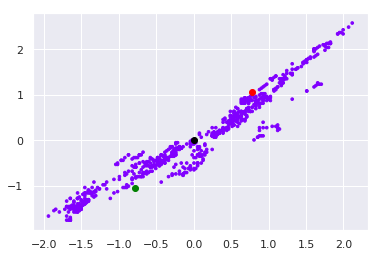

In [47]:
child_center1 = m
child_center2 = -m

plt.scatter(scaled_values[:,0], scaled_values[:,1], c=y_pred, cmap='rainbow', s= 7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.scatter(child_center1[0], child_center1[1], c='red')
plt.scatter(child_center2[0], child_center2[1], c='green')
plt.show()